In [1]:
# Importing the required libraries
import yfinance as yf
import datetime
import pandas as pd

In [2]:
import sys
import os

# Add the project root directory to the Python path
sys.path.append(os.path.abspath(".."))

# Import the INTRADAY_DAYS_LIMIT from your config module
from utils.config import INTRADAY_DAYS_LIMIT

In [3]:
# Displaying the first few rows of the data
stock_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

### Code to get the stock data with 5m interval

In [4]:
# Define the start and end dates for the data
# Days is set to 59 to get the last 60 days of data (That's the maximum number of days for 5m interval)
start_date = datetime.datetime.today() - datetime.timedelta(days=INTRADAY_DAYS_LIMIT)
end_date = datetime.datetime.today()

ohlcv_5 = {}
for ticker in stock_tickers:
    data = yf.download(ticker, start=start_date, end=end_date, interval="5m", multi_level_index=False)
    # Filling missing values with the previous value
    data.bfill(inplace=True)
    ohlcv_5[ticker] = data
ohlcv_5

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'AAPL':                                 Close        High         Low        Open  \
 Datetime                                                                    
 2025-03-18 13:30:00+00:00  214.104996  215.050003  213.750000  214.139999   
 2025-03-18 13:35:00+00:00  214.274994  214.339996  213.589996  214.110001   
 2025-03-18 13:40:00+00:00  213.360001  214.750000  213.360001  214.220001   
 2025-03-18 13:45:00+00:00  213.654999  213.773804  212.949997  213.345001   
 2025-03-18 13:50:00+00:00  213.799194  213.899994  213.309998  213.649994   
 ...                               ...         ...         ...         ...   
 2025-05-15 19:35:00+00:00  210.264999  210.529999  210.149994  210.500000   
 2025-05-15 19:40:00+00:00  210.460007  210.529907  210.225006  210.259995   
 2025-05-15 19:45:00+00:00  210.589996  210.720001  210.375000  210.445007   
 2025-05-15 19:50:00+00:00  210.750198  211.330002  210.520004  210.580002   
 2025-05-15 19:55:00+00:00  211.457993  211.460007  210.

### Code to get the stock data with 1m interval

In [5]:
# Define the start and end dates for the data
# Days is set to 8 to get the last 9 days of data (That's the maximum number of days for 1m interval)
start_date = datetime.datetime.today() - datetime.timedelta(days=8)
end_date = datetime.datetime.today()

ohlcv_1 = {}
for ticker in stock_tickers:
    data = yf.download(ticker, start=start_date, end=end_date, interval="1m", multi_level_index=False)
    # Filling missing values with the previous value
    data.bfill(inplace=True)
    ohlcv_1[ticker] = data
ohlcv_1

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'AAPL':                                 Close        High         Low        Open  \
 Datetime                                                                    
 2025-05-08 13:30:00+00:00  197.990005  198.059998  197.660004  197.740005   
 2025-05-08 13:31:00+00:00  197.649994  198.130005  197.550003  198.009995   
 2025-05-08 13:32:00+00:00  197.660004  197.679993  197.259995  197.639999   
 2025-05-08 13:33:00+00:00  197.080002  197.639999  197.070099  197.639999   
 2025-05-08 13:34:00+00:00  197.050003  197.360001  196.929993  197.050003   
 ...                               ...         ...         ...         ...   
 2025-05-15 19:55:00+00:00  210.839996  211.070007  210.660004  210.740005   
 2025-05-15 19:56:00+00:00  211.050003  211.070007  210.850006  210.850006   
 2025-05-15 19:57:00+00:00  211.235001  211.279999  210.949997  211.039993   
 2025-05-15 19:58:00+00:00  211.104996  211.240005  211.039993  211.235001   
 2025-05-15 19:59:00+00:00  211.457993  211.460007  210.

### Working with the daily data

In [6]:
# Displaying the first few rows of the data
stock_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Define the start and end dates for the data
# Days is set to 59 to get the last 60 days of data (That's the maximum number of days for 5m interval)
start_date = datetime.datetime.today() - datetime.timedelta(days=365)
end_date = datetime.datetime.today()

cl_price = pd.DataFrame()

# Downloading the closing prices for each stock ticker
for ticker in stock_tickers:
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d", multi_level_index=False)
    cl_price[ticker] = data['Close']

# Filling missing values with the previous value
cl_price.bfill(inplace=True)

# # Converting the 'Datetime' column to datetime format
# cl_price['Datetime'] = pd.to_datetime(cl_price['Datetime'])
cl_price

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,GOOGL,AMZN,TSLA
Date,,,,,
2024-05-15,188.836868,420.631744,171.689163,185.990005,173.990005
2024-05-16,188.956299,418.553833,173.351212,183.630005,174.839996
2024-05-17,188.986176,417.778320,175.222275,184.699997,177.460007
2024-05-20,190.150726,422.878662,176.078186,183.539993,174.949997
2024-05-21,191.454636,426.557251,177.003754,183.149994,186.600006
...,...,...,...,...,...
2025-05-09,198.270004,438.730011,152.750000,193.059998,298.260010
2025-05-12,210.789993,449.260010,158.460007,208.639999,318.380005
2025-05-13,212.929993,449.140015,159.529999,211.369995,334.070007


In [7]:
cl_price.describe()

,AAPL,MSFT,GOOGL,AMZN,TSLA
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,222.304134,418.200909,172.135186,197.125976,276.896654
std,16.369076,21.562713,13.207452,19.167584,76.951778
min,172.194199,354.559998,144.699997,161.020004,170.660004
25%,213.072014,408.057007,162.581207,183.645004,220.285004
50%,223.962601,418.553833,170.559998,192.080002,252.399994
75%,232.448898,432.544128,181.347366,210.150002,338.014999
max,258.396667,464.854340,206.142593,242.059998,479.859985


In [8]:
cl_price.head()

,AAPL,MSFT,GOOGL,AMZN,TSLA
Date,,,,,
2024-05-15,188.836868,420.631744,171.689163,185.990005,173.990005
2024-05-16,188.956299,418.553833,173.351212,183.630005,174.839996
2024-05-17,188.986176,417.778320,175.222275,184.699997,177.460007
2024-05-20,190.150726,422.878662,176.078186,183.539993,174.949997
2024-05-21,191.454636,426.557251,177.003754,183.149994,186.600006


In [9]:
# Calculating the daily return
# daily_return = cl_price / cl_price.shift(1) - 1
daily_return = cl_price.pct_change()
daily_return = daily_return.dropna()
daily_return.head()

,AAPL,MSFT,GOOGL,AMZN,TSLA
Date,,,,,
2024-05-16,0.000632,-0.004940,0.009681,-0.012689,0.004885
2024-05-17,0.000158,-0.001853,0.010793,0.005827,0.014985
2024-05-20,0.006162,0.012208,0.004885,-0.006280,-0.014144
2024-05-21,0.006857,0.008699,0.005257,-0.002125,0.066591
2024-05-22,-0.007538,0.003450,-0.008265,-0.000109,-0.034780


In [10]:
daily_return.describe()

,AAPL,MSFT,GOOGL,AMZN,TSLA
count,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,0.000664,0.000428,0.000009,6.291088e-04,0.003736
std,0.020748,0.016205,0.019692,2.181573e-02,0.045720
min,-0.092456,-0.061809,-0.072924,-8.979129e-02,-0.154262
25%,-0.007047,-0.006897,-0.010934,-1.070934e-02,-0.023041
50%,0.002028,0.001007,0.001812,9.356982e-07,0.001390
75%,0.010270,0.008447,0.011032,1.305258e-02,0.031015
max,0.153288,0.101337,0.096821,1.197703e-01,0.226900


In [11]:
daily_return.rolling(window=10).mean()

,AAPL,MSFT,GOOGL,AMZN,TSLA
Date,,,,,
2024-05-16,NaN,NaN,NaN,NaN,NaN
2024-05-17,NaN,NaN,NaN,NaN,NaN
2024-05-20,NaN,NaN,NaN,NaN,NaN
2024-05-21,NaN,NaN,NaN,NaN,NaN
2024-05-22,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-05-09,-0.005136,0.011616,-0.005519,0.002252,0.004878
2025-05-12,0.000767,0.014192,-0.000947,0.011005,0.011297
2025-05-13,0.001273,0.013429,0.000008,0.012478,0.014074


In [12]:
daily_return.rolling(window=10).std()

,AAPL,MSFT,GOOGL,AMZN,TSLA
Date,,,,,
2024-05-16,NaN,NaN,NaN,NaN,NaN
2024-05-17,NaN,NaN,NaN,NaN,NaN
2024-05-20,NaN,NaN,NaN,NaN,NaN
2024-05-21,NaN,NaN,NaN,NaN,NaN
2024-05-22,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-05-09,0.016390,0.024139,0.026144,0.016313,0.025989
2025-05-12,0.027175,0.023926,0.029392,0.029251,0.032627
2025-05-13,0.027311,0.024287,0.029480,0.028912,0.034708


In [13]:
daily_return.rolling(window=10).max()

,AAPL,MSFT,GOOGL,AMZN,TSLA
Date,,,,,
2024-05-16,NaN,NaN,NaN,NaN,NaN
2024-05-17,NaN,NaN,NaN,NaN,NaN
2024-05-20,NaN,NaN,NaN,NaN,NaN
2024-05-21,NaN,NaN,NaN,NaN,NaN
2024-05-22,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-05-09,0.006319,0.076254,0.019157,0.031341,0.047188
2025-05-12,0.063146,0.076254,0.037381,0.080700,0.067458
2025-05-13,0.063146,0.076254,0.037381,0.080700,0.067458


In [14]:
daily_return.rolling(window=10).sum()

,AAPL,MSFT,GOOGL,AMZN,TSLA
Date,,,,,
2024-05-16,NaN,NaN,NaN,NaN,NaN
2024-05-17,NaN,NaN,NaN,NaN,NaN
2024-05-20,NaN,NaN,NaN,NaN,NaN
2024-05-21,NaN,NaN,NaN,NaN,NaN
2024-05-22,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-05-09,-0.051363,0.116157,-0.055188,0.022519,0.048779
2025-05-12,0.007673,0.141919,-0.009471,0.110045,0.112973
2025-05-13,0.012734,0.134290,0.000083,0.124782,0.140741


In [15]:
# Rolling operations (exponentialy weighted)
daily_return.ewm(com=10, min_periods=10).mean()

,AAPL,MSFT,GOOGL,AMZN,TSLA
Date,,,,,
2024-05-16,NaN,NaN,NaN,NaN,NaN
2024-05-17,NaN,NaN,NaN,NaN,NaN
2024-05-20,NaN,NaN,NaN,NaN,NaN
2024-05-21,NaN,NaN,NaN,NaN,NaN
2024-05-22,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-05-09,-0.001878,0.007766,-0.002692,0.003646,0.010099
2025-05-12,0.004033,0.009242,0.000951,0.010651,0.015313
2025-05-13,0.004589,0.008378,0.001478,0.010872,0.018401


In [16]:
daily_return.ewm(com=10, min_periods=10).std()

,AAPL,MSFT,GOOGL,AMZN,TSLA
Date,,,,,
2024-05-16,NaN,NaN,NaN,NaN,NaN
2024-05-17,NaN,NaN,NaN,NaN,NaN
2024-05-20,NaN,NaN,NaN,NaN,NaN
2024-05-21,NaN,NaN,NaN,NaN,NaN
2024-05-22,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-05-09,0.028788,0.024435,0.028544,0.026345,0.046648
2025-05-12,0.033471,0.023784,0.029666,0.033855,0.047579
2025-05-13,0.031964,0.022849,0.028337,0.032288,0.046455


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

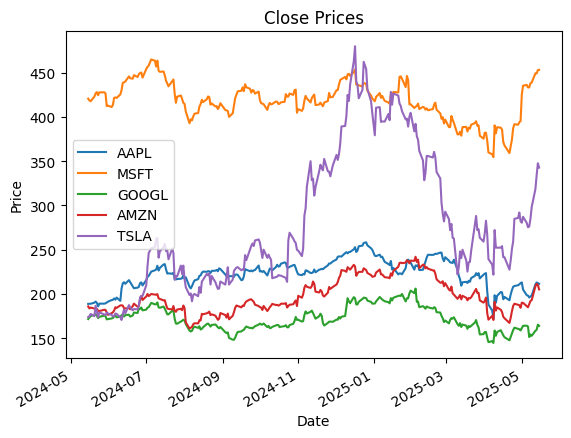

In [24]:
#plotting close prices
cl_price.plot() 
plt.title('Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(stock_tickers)

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>]], dtype=object)

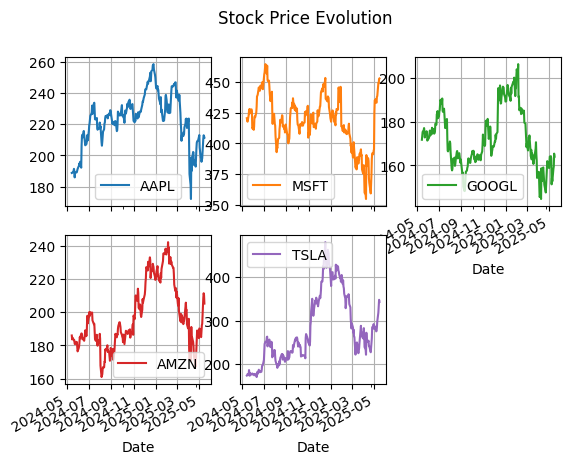

In [25]:
cl_price.plot(subplots=True, layout = (2,3), title = "Stock Price Evolution", grid =True) # Subplots of the stocks


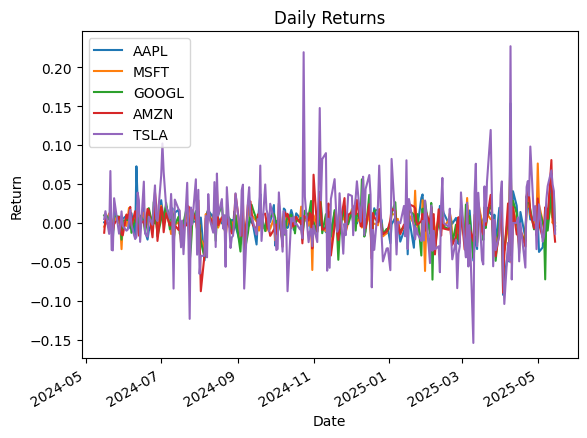

In [26]:
daily_return.plot()
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(stock_tickers)

<Axes: title={'center': 'Stock Price Evolution'}, xlabel='Date'>

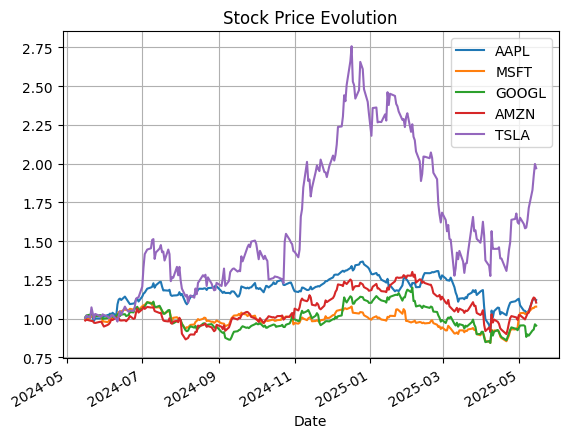

In [27]:
(1+daily_return).cumprod().plot(title = "Stock Price Evolution", grid =True) 

<Axes: title={'center': 'Stock Price Evolution'}, xlabel='Date'>

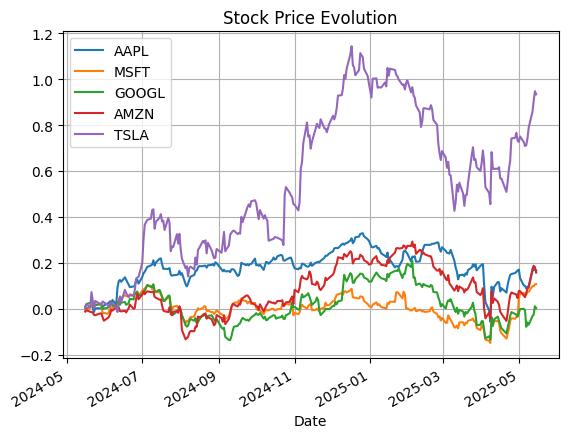

In [29]:
(daily_return).cumsum().plot(title = "Stock Price Evolution", grid =True) 

<BarContainer object of 5 artists>

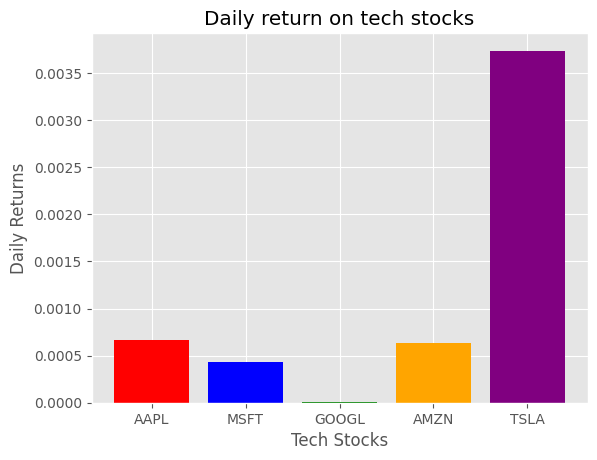

In [32]:
# Pyplot demo
fig, ax = plt.subplots()
plt.style.available
plt.style.use('ggplot')
ax.set(title="Daily return on tech stocks", xlabel="Tech Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.mean(),color=["red","blue","green","orange","purple"])